In [1]:
import pandas as pd
import torch
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import utils as util
import linearModel
import numpy as np

In [2]:
# 데이터 로드
data = pd.read_csv("./data/final_data.csv")

# 데이터 정보
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [3]:
# 데이터 요약
print(data.tail())

                                          player                      team  \
10749       /aidan-simmons/profil/spieler/867763  Western Sydney Wanderers   
10750        /kusini-yengi/profil/spieler/708099  Western Sydney Wanderers   
10751    /nathanael-blair/profil/spieler/1023268  Western Sydney Wanderers   
10752    /zachary-sapsford/profil/spieler/703657  Western Sydney Wanderers   
10753  /alexander-badolato/profil/spieler/957230  Western Sydney Wanderers   

                     name               position      height   age  \
10749       Aidan Simmons     Attack-RightWinger  181.240353  20.0   
10750        Kusini Yengi  Attack Centre-Forward  190.000000  24.0   
10751     Nathanael Blair  Attack Centre-Forward  181.240353  19.0   
10752    Zachary Sapsford  Attack Centre-Forward  181.240353  20.0   
10753  Alexander Badolato  Attack Centre-Forward  170.000000  18.0   

       appearance     goals   assists  yellow cards  ...  goals conceded  \
10749          16  0.175953  0.087

In [4]:
print(data.isnull().sum())

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
highest_value          0
position_encoded       0
winger                 0
current_value          0
dtype: int64


In [5]:
# 데이터 전처리
print(f"이전 데이터 data 개수: {data.shape}")

x, y = util.preprocess_data(data)

print(f"전처리 후 x data 개수: {x.shape}")
print(f"전처리 후 y data 개수: {y.shape}")

이전 데이터 data 개수: (10754, 22)
전처리 후 x data 개수: (2902, 14)
전처리 후 y data 개수: (2902,)


In [6]:
# 데이터 정규화
x_scaled, y_scaled, scaler_x, scaler_y = util.standardize_data(x, y)

In [7]:
# 학습/테스트 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# 8. 데이터를 PyTorch 텐서로 변환
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

(2321, 14)
(2321, 1)
(581, 14)
(581, 1)


In [8]:
# 모델 불러오기
input_dim = x_train_tensor.shape[1]
model = linearModel.LinearModel(input_dim=input_dim)
model.load_state_dict(torch.load("./model/model.pth", weights_only=True))
model.eval()

LinearModel(
  (hidden1): Linear(in_features=14, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
)

In [9]:
with torch.no_grad():
    y_pred_test = model(x_test_tensor)

Test MSE: 6996715620210.2520
RMSE: 2645130.5488
Test R²: 0.9154


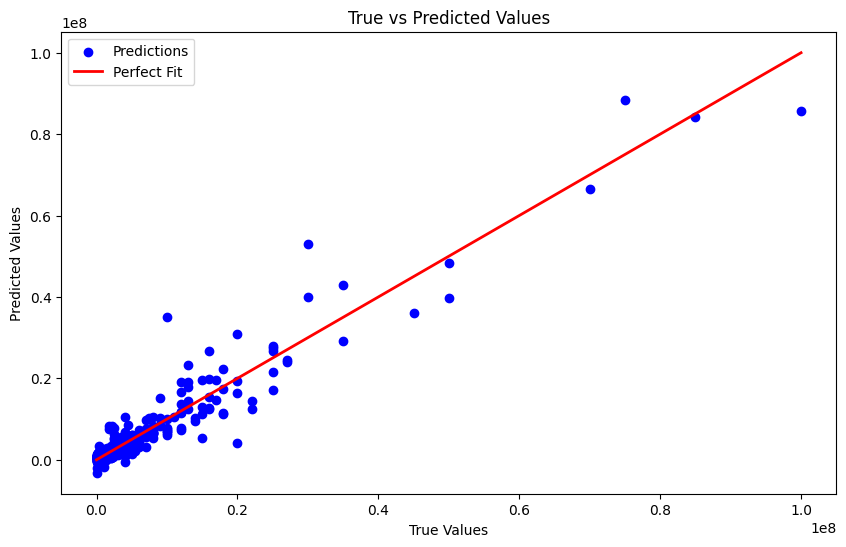

In [10]:
# 예측 값을 실제 값으로 변환
y_pred_test_original = scaler_y.inverse_transform(y_pred_test)
y_test_original = scaler_y.inverse_transform(y_test_tensor)

mse = mean_squared_error(y_test_original, y_pred_test_original)
r2 = r2_score(y_test_original, y_pred_test_original)
rmse = np.sqrt(mse)

print(f"Test MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"Test R²: {r2:.4f}")

# 결과 시각화
util.plot_prediction_result(y_test_original, y_pred_test_original)